In [1]:
%matplotlib notebook
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
from scipy import stats
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii

In [2]:
f=h5py.File("/Users/katel/Downloads/Research-Dr.Bovill/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram01_tidal01_ode_vel300_sfr390.hdf5", 'r')

In [3]:
stellar_mass1=np.array(f['Outputs']['Output1']['nodeData']['massStellarTotal'])

mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]




l=np.argmax(mass_dm)
x=f['Outputs']['Output1']['nodeData']['positionPositionX'][:]-f['Outputs']['Output1']['nodeData']['positionPositionX'][:][l]
y=f['Outputs']['Output1']['nodeData']['positionPositionY'][:]-f['Outputs']['Output1']['nodeData']['positionPositionY'][:][l]
z=f['Outputs']['Output1']['nodeData']['positionPositionZ'][:]-f['Outputs']['Output1']['nodeData']['positionPositionZ'][:][l]
Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:SDSS_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:SDSS_g:observed:z0.0000'][:]
#Distance
d=np.sqrt(x**2.0+y**2.0+z**2.0)
Mg=-2.5*np.log10(Lg)
#Satellite mask
satellite_mask=(d<0.4)&(mass_dm<np.amax(mass_dm))
stellar_mass=stellar_mass1[satellite_mask]
order=np.argsort(stellar_mass)
ID=f['Outputs']['Output1']['nodeData']['satelliteNodeIndex'][:][satellite_mask][order]

<ipython-input-3-bdee70e82fd8>:15: RuntimeWarning: divide by zero encountered in log10
  Mg=-2.5*np.log10(Lg)
<ipython-input-3-bdee70e82fd8>:15: RuntimeWarning: invalid value encountered in log10
  Mg=-2.5*np.log10(Lg)


In [4]:
sfh_sph=f['starFormationHistories']['Output1']['spheroidStarFormationHistory'][:][satellite_mask][order]
sfh_disk=f['starFormationHistories']['Output1']['diskStarFormationHistory'][:][satellite_mask][order]

time=f['starFormationHistories']['Output1']['time'][:]
print(time)

[ 0.16  0.32  0.48  0.64  0.8   0.96  1.12  1.28  1.44  1.6   1.68  1.76
  1.84  1.92  2.    2.08  2.16  2.24  2.32  2.4   2.48  2.56  2.64  2.72
  2.8   2.88  2.96  3.04  3.12  3.2   3.28  3.36  3.44  3.52  3.6   3.68
  3.76  3.84  3.92  4.    4.08  4.16  4.24  4.32  4.4   4.48  4.56  4.64
  4.72  4.8   4.88  4.96  5.04  5.12  5.2   5.28  5.36  5.44  5.52  5.6
  5.68  5.76  5.84  5.92  6.    6.08  6.16  6.24  6.32  6.4   6.48  6.56
  6.64  6.72  6.8   6.88  6.96  7.04  7.12  7.2   7.28  7.36  7.44  7.52
  7.6   7.68  7.72  7.76  7.8   7.84  7.88  7.92  7.96  8.    8.04  8.08
  8.12  8.16  8.2   8.24  8.28  8.32  8.36  8.4   8.44  8.48  8.52  8.56
  8.6   8.64  8.68  8.72  8.76  8.8   8.84  8.88  8.92  8.96  9.    9.04
  9.08  9.12  9.16  9.2   9.24  9.28  9.32  9.36  9.4   9.44  9.48  9.52
  9.56  9.6   9.64  9.68  9.72  9.76  9.8   9.84  9.88  9.92  9.96 10.
 10.04 10.08 10.12 10.16 10.2  10.24 10.28 10.32 10.36 10.4  10.44 10.48
 10.52 10.56 10.6  10.64 10.68 10.7  10.72 10.74 10.76

In [5]:
stellarmass_mask=(stellar_mass[order]>0) 
sfh_tot = sfh_disk[stellarmass_mask][:] + sfh_sph[stellarmass_mask][:]
print(sfh_tot[10][0])

[0.00000000e+00 0.00000000e+00 8.03102531e+02 1.09344919e+03
 6.42482818e+02 5.65109691e+02 7.24411514e+02 8.98535796e+02
 5.59304598e+02 5.61715574e+02 2.76394539e+02 2.77031785e+02
 2.29029247e+02 2.51267073e+02 2.27702418e+02 2.30370008e+02
 2.17164594e+02 1.62138913e+02 1.90715185e+02 1.57854622e+02
 1.73189765e+02 1.00541677e+02 1.72550646e+02 1.43142760e+02
 1.07971051e+02 1.14705028e+02 8.29750165e+01 1.30221843e+02
 7.74787461e+01 1.18561347e+02 8.86109697e+01 6.44491980e+01
 1.02402764e+02 6.02835700e+01 9.43064234e+01 6.98727401e+01
 5.06317820e+01 8.24786508e+01 4.79688071e+01 7.51521487e+01
 5.62104618e+01 4.09315980e+01 6.65081486e+01 3.81005592e+01
 6.03592809e+01 4.53423264e+01 3.94487055e+01 6.32257111e+00
 1.61369674e-11 1.27772508e-11 6.34630621e-12 5.77004741e-12
 3.56444839e-12 3.10194965e-12 1.51994557e-12 1.43964041e-12
 3.90310772e-15 7.61403781e-14 6.36176471e-13 5.91594861e-13
 1.82876587e-12 3.50231856e-12 6.68403053e-12 1.74342717e-11
 4.57026991e-11 1.586803

<IPython.core.display.Javascript object>


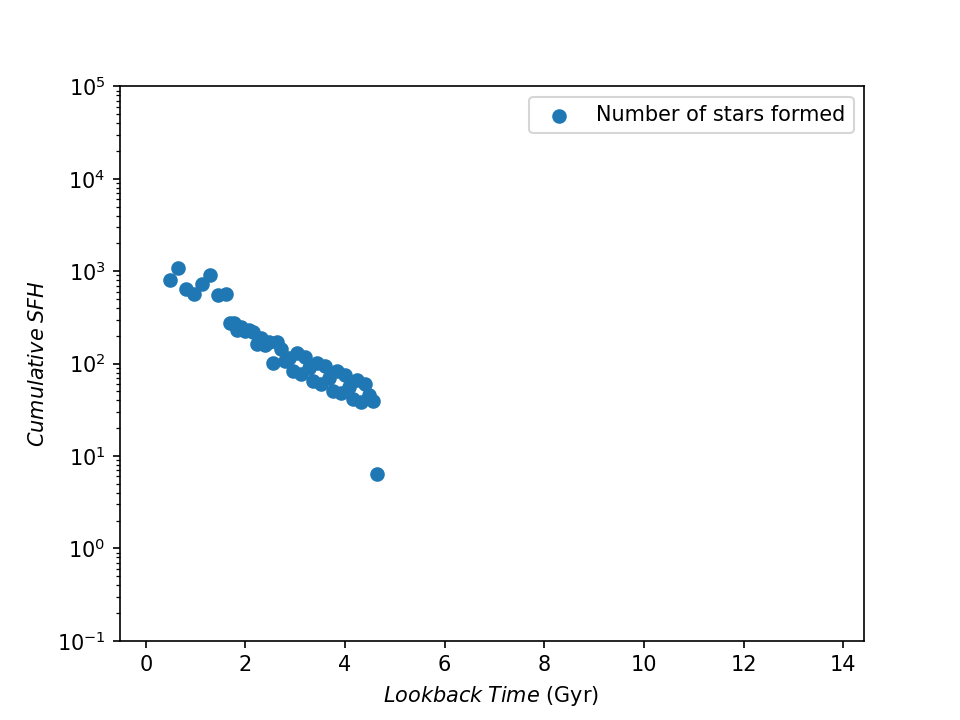

In [6]:
fig=plt.figure()
ax = plt.subplot()
   

plt.scatter(time,sfh_tot[10][0])
# plt.title('$Total\;Stellarmass$')
plt.yscale('log')
plt.ylim(0.1,10**5.0)
plt.ylabel('$Cumulative\;SFH$',fontsize=10)
plt.xlabel('$Lookback\;Time$ (Gyr) ',fontsize=10)
plt.legend(['Number of stars formed'])
plt.show()
# plt.savefig('Total1.pdf')

In [7]:
#sfh_sph=f['starFormationHistories']['Output1']['spheroidStarFormationHistory'][:]
#print(sfh_sph[:,0][0])

hlr=f['Outputs']['Output1']['nodeData']['halfLightRadiusSDSS_g:observed:z0.0000'][:][satellite_mask][order]

In [8]:
sfh_cum=np.zeros((len(hlr[stellarmass_mask]),1,len(time)))
for sat in range(len(sfh_cum)):
    sfh_cum[sat]=np.cumsum((sfh_tot[sat]),axis=1)
print(np.shape(sfh_cum[10][0]))   


(390,)


<IPython.core.display.Javascript object>


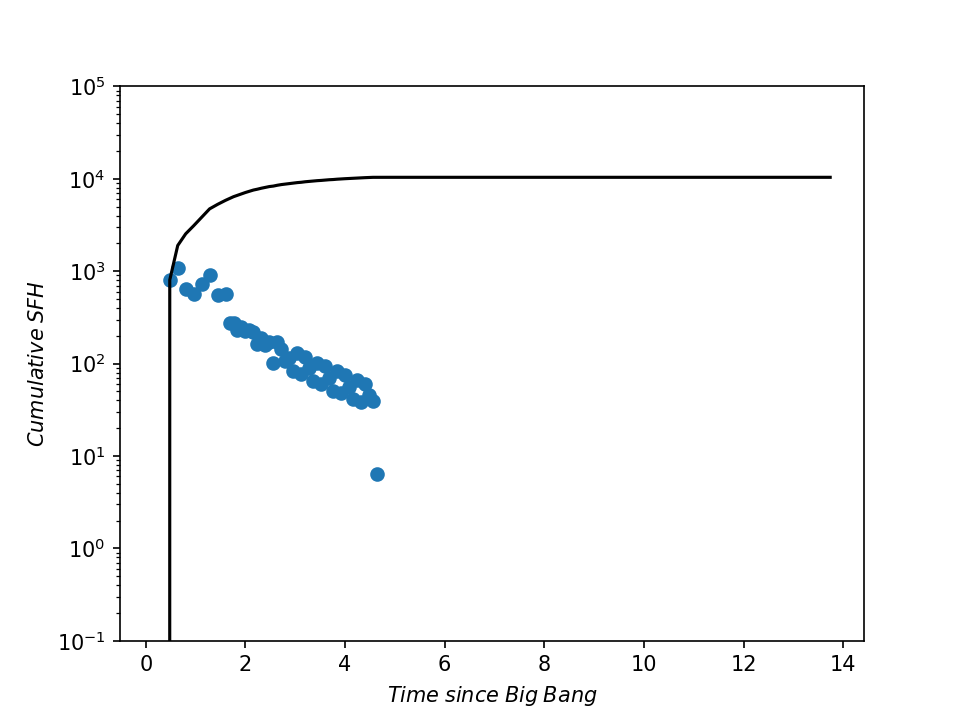

In [9]:
fig = plt.figure()
ax = plt.subplot()

plt.scatter(time,sfh_tot[10][0])
plt.yscale('log')
plt.ylim(0.1,10**5.0)
plt.show()


ax.plot(time,sfh_cum[10][0], "k")
ax.set_yscale('log')
ax.set_ylim(0.1,10**5.0)
# plt.legend(['Reionization phase','Number of star formation'])
plt.ylabel('$Cumulative\;SFH$',fontsize=10)
plt.xlabel('$Time\;since\;Big\;Bang$',fontsize=10)
plt.show()
# plt.savefig('Reionize.pdf')           

In [10]:
N = len(time)

print(sfh_cum[20][0][N-1])

sfh_cum_norm = sfh_cum[20][0]/sfh_cum[20][0][N-1]

75034.54858594021


<IPython.core.display.Javascript object>


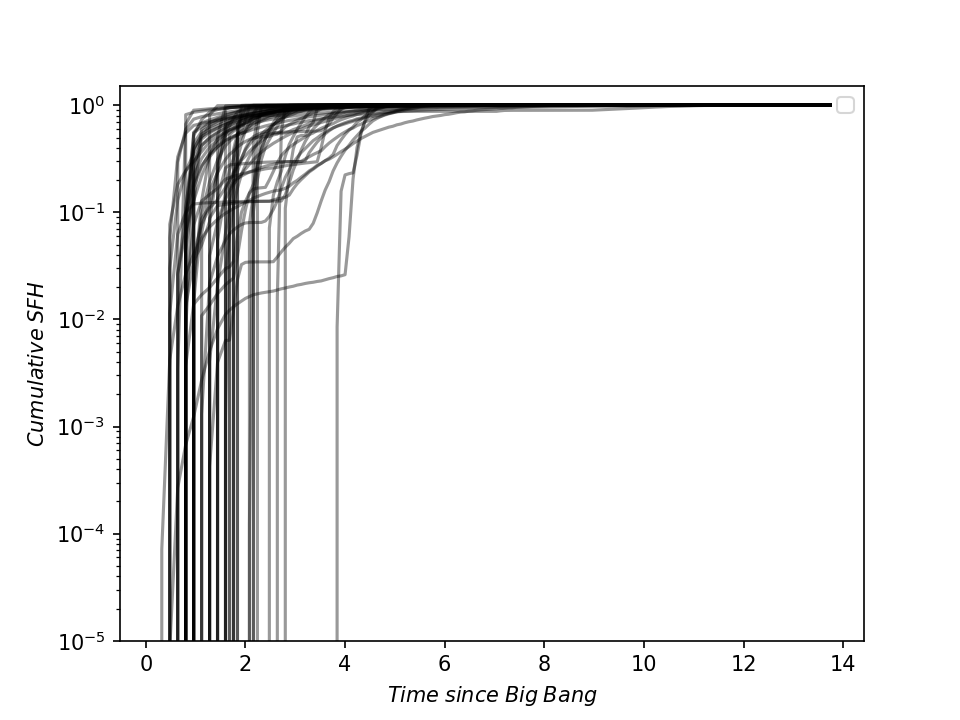

In [11]:
fig = plt.figure()
ax = plt.subplot()

for i in range(0,68):
    sfh_cum_norm = sfh_cum[i][0]/sfh_cum[i][0][N-1]
    if(sfh_cum_norm[68]>0.8):
        ax.plot(time,sfh_cum_norm,c='black',alpha=0.4)

ax.set_yscale('log')
ax.set_ylim(10**-5.0,1.5)
plt.legend('')
plt.ylabel('$Cumulative\;SFH$',fontsize=10)
plt.xlabel('$Time\;since\;Big\;Bang$', fontsize=10)
plt.show()
plt.savefig('Reionize-Halos[68].pdf')

In [12]:
for i in range(0,68):
    print(time[i])


0.16
0.32
0.48000000000000004
0.64
0.8
0.9600000000000001
1.12
1.28
1.44
1.6
1.68
1.76
1.84
1.9200000000000002
2.0
2.0799999999999996
2.1599999999999997
2.2399999999999998
2.32
2.4
2.48
2.56
2.6399999999999997
2.7199999999999998
2.8
2.88
2.96
3.04
3.1199999999999997
3.1999999999999997
3.28
3.36
3.44
3.52
3.5999999999999996
3.6799999999999997
3.76
3.84
3.92
4.0
4.08
4.16
4.24
4.32
4.3999999999999995
4.4799999999999995
4.56
4.64
4.72
4.8
4.88
4.96
5.04
5.12
5.2
5.28
5.36
5.4399999999999995
5.52
5.6
5.68
5.76
5.84
5.92
6.0
6.08
6.16
6.24


In [13]:
print(time[1])

0.32
